In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [27]:
diamonds = pd.read_csv("dataset/diamonds.csv", index_col=0)

In [28]:
diamonds["volume"] = diamonds["x"] * diamonds["y"] * diamonds["z"]
diamonds = diamonds.drop(["x", "y", "z"], axis= 1)
diamonds = diamonds.drop(diamonds.index[diamonds["volume"]== 0], axis= 0)

In [29]:
diamonds.head()

carat      cut color clarity  depth  table  price     volume
1   0.23    Ideal     E     SI2   61.5   55.0    326  38.202030
2   0.21  Premium     E     SI1   59.8   61.0    326  34.505856
3   0.23     Good     E     VS1   56.9   65.0    327  38.076885
4   0.29  Premium     I     VS2   62.4   58.0    334  46.724580
5   0.31     Good     J     SI2   63.3   58.0    335  51.917250

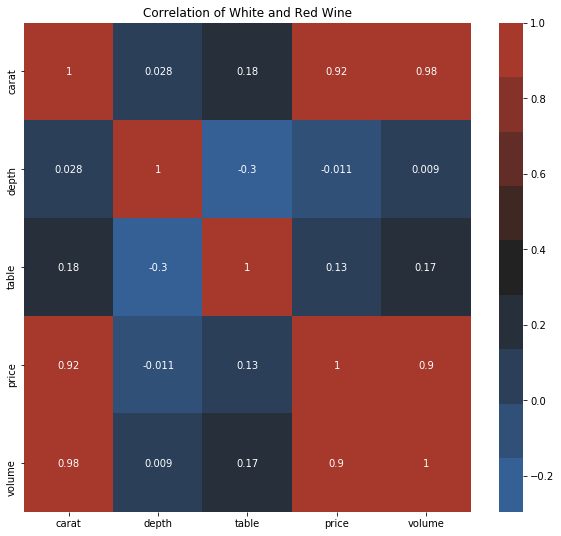

In [30]:
plt.figure(figsize=(10, 9))
df_corr = diamonds.corr()
sns.heatmap(df_corr, cmap= sns.diverging_palette(250, 15, s=75, l=40,n=9, center="dark"), annot=True)
plt.title("Correlation of White and Red Wine")
plt.show()

Highest Price in Diamond dataset:  18823


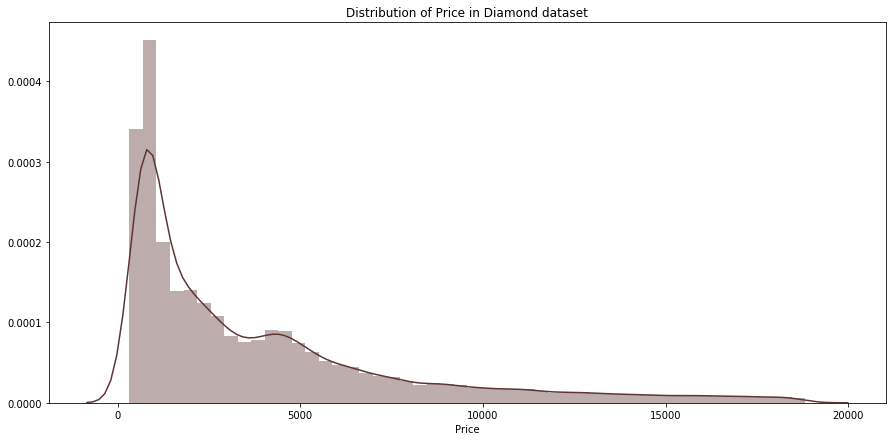

In [63]:
plt.figure(figsize=(15, 7))
sns.distplot(diamonds["price"], color="#5E3434")
plt.xlabel("Price")
plt.title("Distribution of Price in Diamond dataset")
print("Highest Price in Diamond dataset: ", diamonds["price"].max())
plt.show()

Highest Carat in Diamond dataset:  5.01


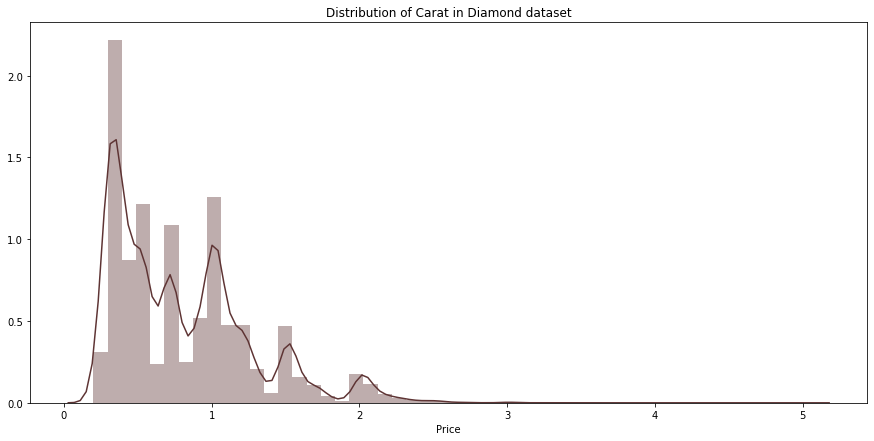

In [64]:
plt.figure(figsize=(15, 7))
sns.distplot(diamonds["carat"], color="#5E3434")
plt.xlabel("Price")
plt.title("Distribution of Carat in Diamond dataset")
print("Highest Carat in Diamond dataset: ", diamonds["carat"].max())
plt.show()

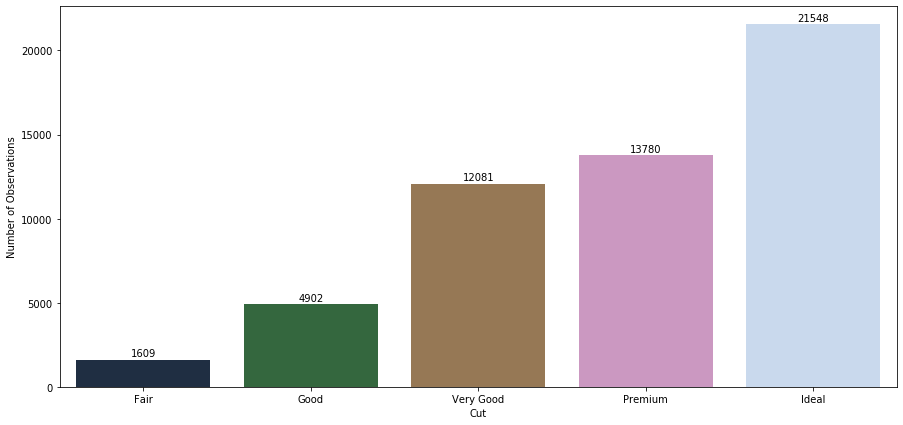

In [31]:
# From Worst to Best (Fair= Worst) ,(Ideal= Best)
plt.figure(figsize= (15, 7))
cut = sns.countplot(x= "cut", data= diamonds, palette= sns.color_palette("cubehelix", 5),
              order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Number of Observations")
for p in cut.patches:
    height = p.get_height().round(2)
    text = str(height)
    cut.text(p.get_x()+p.get_width()/2,height + 200,text, ha="center")
plt.show()

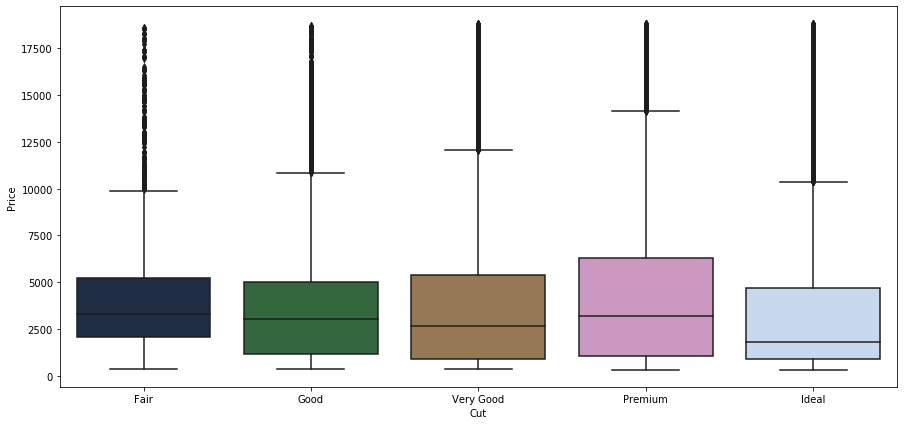

In [32]:
plt.figure(figsize= (15, 7))
sns.boxplot(x= "cut", y= "price", data= diamonds, palette= sns.color_palette("cubehelix", 5),
            order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

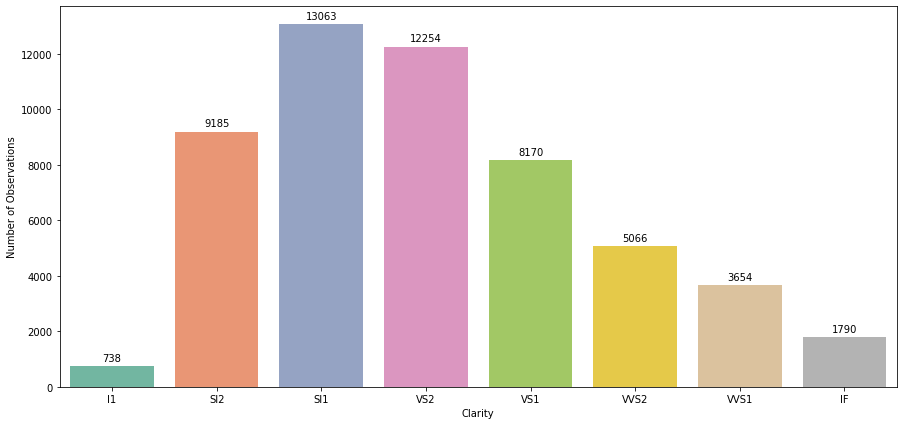

In [33]:
# From Worst to Best (I1= Worst) (IF= Best)
plt.figure(figsize= (15, 7))
clarity = sns.countplot(x= "clarity", data= diamonds, order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], palette= "Set2")
plt.xlabel("Clarity")
plt.ylabel("Number of Observations")
for p in clarity.patches:
    height = p.get_height().round(2)
    text = str(height)
    clarity.text(p.get_x()+p.get_width()/2,height + 200,text, ha="center")

plt.show()

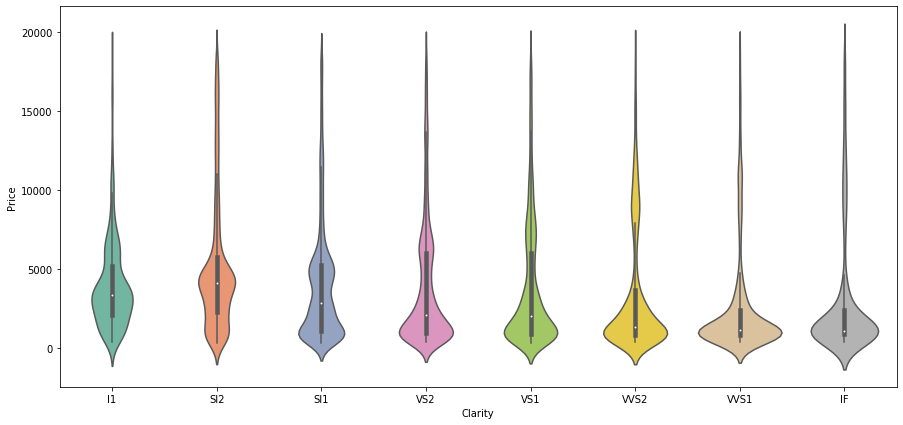

In [34]:
plt.figure(figsize= (15, 7))
sns.violinplot(x= "clarity", y= "price", data= diamonds,
            order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], palette= "Set2")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()

In [35]:
color_dict = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#5E3434"]

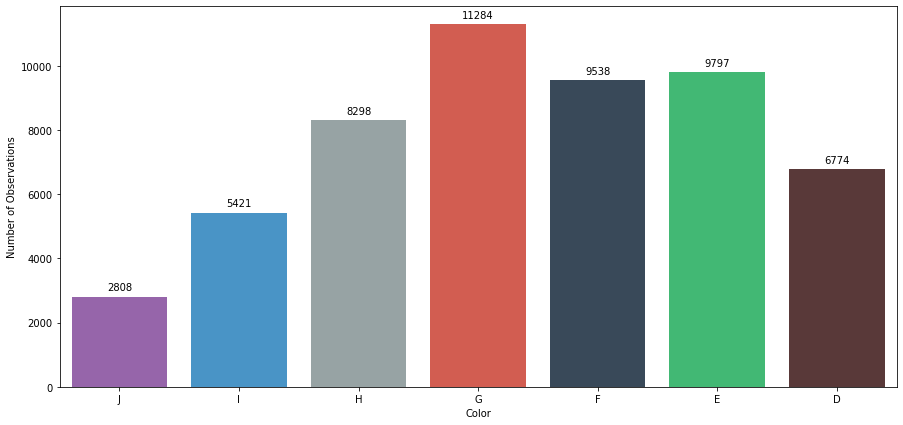

In [36]:
# From Worst to Best (J= Worst) (D= Best)
plt.figure(figsize= (15, 7))
color = sns.countplot(x= "color", data= diamonds, palette= color_dict, order=["J", "I", "H", "G", "F", "E", "D"])
plt.xlabel("Color")
plt.ylabel("Number of Observations")
for p in color.patches:
    height = p.get_height().round(2)
    text = str(height)
    color.text(p.get_x()+p.get_width()/2,height + 200,text, ha="center")
plt.show()

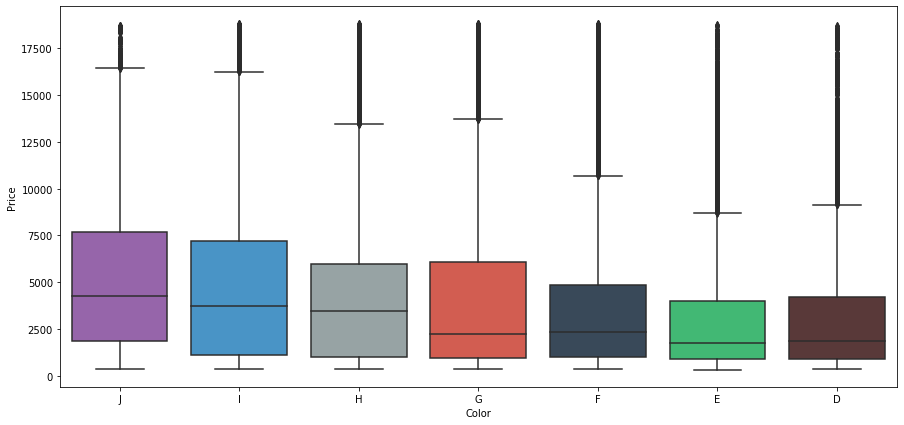

In [37]:
plt.figure(figsize= (15, 7))
sns.boxplot(x= "color", y= "price", data= diamonds, palette= color_dict, order=["J", "I", "H", "G", "F", "E", "D"])
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()

Correlation of Depth and Table of Diamonds:  -0.3


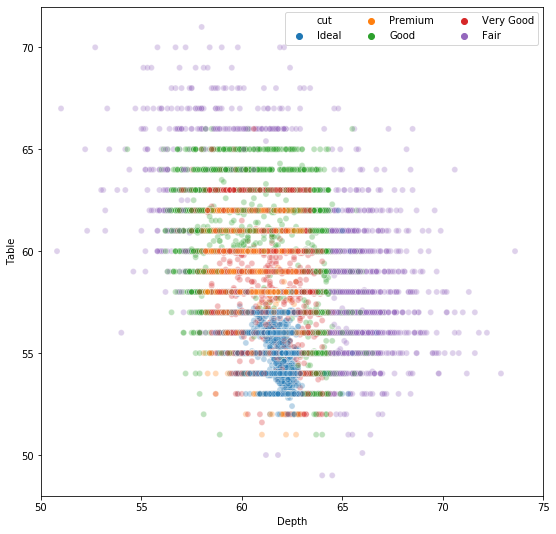

In [66]:
plt.figure(figsize= (9, 9))
sns.scatterplot(x= "depth", y= "table", data= diamonds, y_jitter=True, x_jitter= True, alpha=.3, hue= "cut")
plt.xlabel("Depth")
plt.ylabel("Table")
plt.legend(ncol= 3)
plt.xlim(50, 75)
plt.ylim(48, 72)
print("Correlation of Depth and Table of Diamonds: ", round(diamonds["table"].corr(diamonds["depth"]),2))
plt.show()

In [39]:
fig = px.scatter_3d(diamonds, x='carat', y='volume', z='price', color= "cut")
fig.show()